In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pymoo.indicators.hv import HV

In [2]:
from helpers.visualizer import plot_pareto_front
from warren_buffett import WarrenBuffett

In [3]:
from moead import Instance, MOEADAlgorithm, MetricEvaluator, ScalarizingFunctionGenerator
from moead.utils import create_pareto_front

from moead.visualization.individuals import plot_igd_for_generations, get_generations_plot
from moead.visualization.pareto_front import plot_pareto_fronts

from moead.experiment import read_to_df
from moead.visualization.pareto_front import get_pareto_fronts_plot
from moead.visualization.individuals import show_all_generation_plots
from moead.visualization.igd import show_igd_heatmap

In [4]:
import os
print(os.path.exists("../res/predictions/predictions3.csv"))
print(os.getcwd())

True
C:\Users\jedra\Uni\AI-Master\Multi-objective-optimization\fake-stock-predictions-challenge\src


In [5]:
preds = pd.read_csv("../res/predictions/predictions3.csv")
preds.set_index("time", inplace=True)

In [6]:
wb = WarrenBuffett(preds, path="../res/assets_bundles/Bundle3")
wsm_pareto_front = wb.make_me_rich()
reference_pareto = [(p, r) for (_, p, r) in wsm_pareto_front[::]]

predictions = np.array(list(wb.get_expected_returns().values()))
cov_matrix = wb.get_covariance_matrix()

instance = Instance(cov_matrix, predictions)
min_risk_solution = min(wsm_pareto_front, key=lambda x: x[1])

     pcost       dcost       gap    pres   dres
 0: -4.4257e+00 -2.7439e+00  8e+01  7e+00  6e+00
 1: -4.8412e-01 -2.6085e+00  2e+00  1e-14  1e-15
 2: -1.2234e+00 -1.7526e+00  5e-01  2e-15  6e-16
 3: -1.7294e+00 -1.7473e+00  2e-02  2e-16  7e-16
 4: -1.7438e+00 -1.7439e+00  2e-04  2e-16  6e-16
 5: -1.7439e+00 -1.7439e+00  2e-06  4e-16  7e-16
 6: -1.7439e+00 -1.7439e+00  2e-08  2e-16  8e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.1900e-04 -1.0004e+00  1e+00  1e-16  5e+00
 1:  2.1865e-04 -1.0443e-02  1e-02  2e-16  5e-02
 2:  1.9468e-04 -4.1967e-04  6e-04  1e-16  3e-03
 3:  1.1660e-04  4.7819e-06  1e-04  5e-17  7e-19
 4:  1.0305e-04  8.2640e-05  2e-05  4e-17  4e-19
 5:  9.8710e-05  9.7158e-05  2e-06  4e-17  4e-19
 6:  9.8511e-05  9.8469e-05  4e-08  7e-17  3e-19
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  2.7432e-02 -1.0177e+00  1e+00  0e+00  5e+00
 1:  2.6696e-02 -2.3469e-02  5e-02  5e-17  2e-01
 2:  2.3175e-02  1.5938e

In [7]:
# from moead.experiment import run_experiment, read_to_df
# 
# 
# function_numbers = [10, 30, 50, 100]
# generations = [100, 300, 500, 1_000]
# RUN_PER_CONFIG = 20
# 
# kwargs = {
#     "initial_assignment": "greedy",
#     "generate_high_risk_vectors": False,
# }
# 
# run_experiment(instance, function_numbers, generations, RUN_PER_CONFIG, "../res/experiment_results/history5", reference_pareto, kwargs)

Function Number: 100, Gen: 1000 Run: 19: 100%|██████████| 320/320 [10:23<00:00,  1.95s/it]


In [21]:
ROOT = '../res/experiment_results/history5'
experiment_df = read_to_df(ROOT)

In [22]:
from moead.metrics.igd import calculate_igd_for_group

grouped = experiment_df.groupby(['Generation', 'Run_id', 'Scalar_funcs', 'TotalGenerations']).agg(list)
grouped.reset_index(inplace=True)

# Apply the calculate_igd_for_group function to each group and assign the result to a new column
grouped['IGD'] = grouped.apply(lambda x:calculate_igd_for_group(x, reference_pareto), axis=1)

In [23]:
# Merge the grouped DataFrame back to the original DataFrame based on the grouped columns
experiment_df = pd.merge(experiment_df, grouped, on=['Generation', 'Run_id', 'Scalar_funcs', 'TotalGenerations'], how='left')
experiment_df.drop(columns=['Profit_y', 'Risk_y', 'Diversity_y'], inplace=True)
experiment_df.rename(columns={'Profit_x': 'Profit', 'Risk_x': 'Risk', 'Diversity_x': 'Diversity'}, inplace=True)
experiment_df

,Profit,Risk,Diversity,Generation,Run_id,Scalar_funcs,TotalGenerations,IGD
0,0.413635,0.000436,4,0,0,100,100,0.032466
1,0.413635,0.000436,4,0,0,100,100,0.032466
2,0.413635,0.000436,4,0,0,100,100,0.032466
3,0.413635,0.000436,4,0,0,100,100,0.032466
4,0.413635,0.000436,4,0,0,100,100,0.032466
...,...,...,...,...,...,...,...,...
167195,0.365455,0.000208,2,500,9,50,500,0.009747
167196,0.337022,0.000190,2,500,9,50,500,0.009747
167197,0.327236,0.000186,2,500,9,50,500,0.009747
167198,0.271816,0.000168,1,500,9,50,500,0.009747


In [24]:
experiment_df['IGD'] = experiment_df['IGD'].astype(float)
experiment_df['TotalGenerations'] = experiment_df['TotalGenerations'].astype(int)
experiment_df['Scalar_funcs'] = experiment_df['Scalar_funcs'].astype(int)
experiment_df['Generation'] = experiment_df['Generation'].astype(int)
experiment_df['Run_id'] = experiment_df['Run_id'].astype(int)
experiment_df['Profit'] = experiment_df['Profit'].astype(float)
experiment_df['Risk'] = experiment_df['Risk'].astype(float)
experiment_df['Diversity'] = experiment_df['Diversity'].astype(int)
experiment_df

,Profit,Risk,Diversity,Generation,Run_id,Scalar_funcs,TotalGenerations,IGD
0,0.413635,0.000436,4,0,0,100,100,0.032466
1,0.413635,0.000436,4,0,0,100,100,0.032466
2,0.413635,0.000436,4,0,0,100,100,0.032466
3,0.413635,0.000436,4,0,0,100,100,0.032466
4,0.413635,0.000436,4,0,0,100,100,0.032466
...,...,...,...,...,...,...,...,...
167195,0.365455,0.000208,2,500,9,50,500,0.009747
167196,0.337022,0.000190,2,500,9,50,500,0.009747
167197,0.327236,0.000186,2,500,9,50,500,0.009747
167198,0.271816,0.000168,1,500,9,50,500,0.009747


In [25]:
mean_igd_df = experiment_df.groupby(['Generation', 'Scalar_funcs', 'TotalGenerations']).mean().reset_index()
mean_igd_df.drop(columns=['Run_id', 'Profit', 'Risk', 'Diversity'], inplace=True)
mean_igd_df['Generation'] = mean_igd_df['Generation'].astype(int)
mean_igd_df['TotalGenerations'] = mean_igd_df['TotalGenerations'].astype(int)
mean_igd_df['Scalar_funcs'] = mean_igd_df['Scalar_funcs'].astype(int)
mean_igd_df['IGD'] = mean_igd_df['IGD'].astype(float)
# mean_igd_df

,Profit,Risk,Diversity,Generation,Run_id,Scalar_funcs,TotalGenerations,IGD
0,0.413635,0.000436,4,0,0,100,100,0.032466
1,0.413635,0.000436,4,0,0,100,100,0.032466
2,0.413635,0.000436,4,0,0,100,100,0.032466
3,0.413635,0.000436,4,0,0,100,100,0.032466
4,0.413635,0.000436,4,0,0,100,100,0.032466
...,...,...,...,...,...,...,...,...
167195,0.365455,0.000208,2,500,9,50,500,0.009747
167196,0.337022,0.000190,2,500,9,50,500,0.009747
167197,0.327236,0.000186,2,500,9,50,500,0.009747
167198,0.271816,0.000168,1,500,9,50,500,0.009747


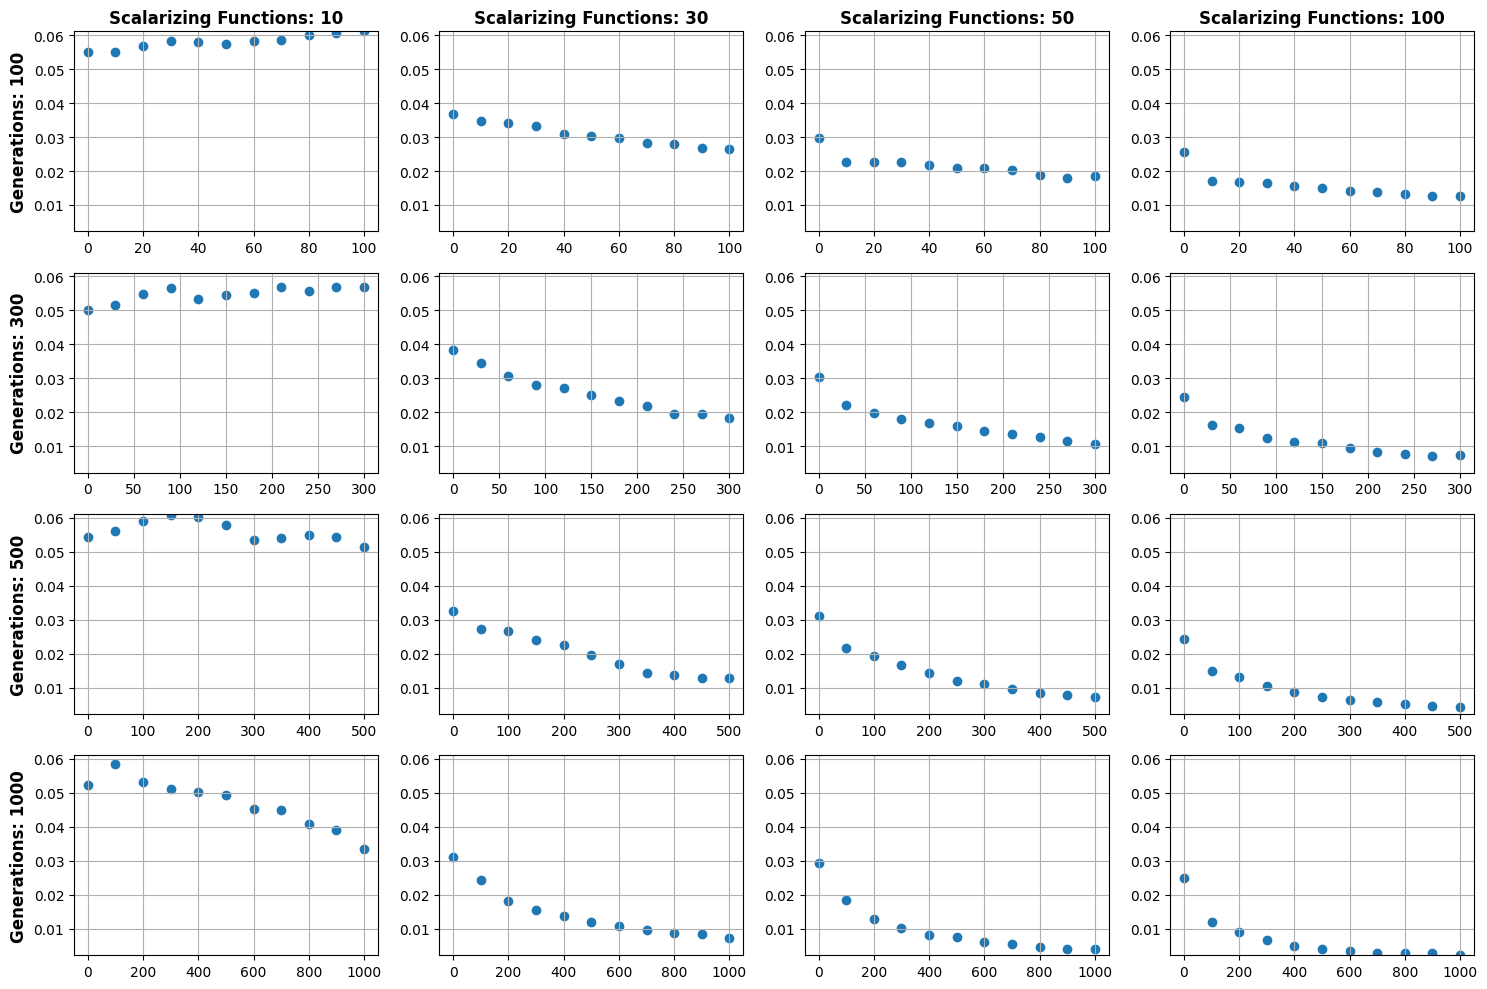

In [26]:
_, axs = plt.subplots(mean_igd_df['TotalGenerations'].nunique(), mean_igd_df['Scalar_funcs'].nunique(), figsize=(15, 10))

min_igd = mean_igd_df['IGD'].min()
max_igd = mean_igd_df['IGD'].max()

for i, gen in enumerate(sorted(mean_igd_df['TotalGenerations'].unique())):
    for j, scalar_funcs in enumerate(sorted(mean_igd_df['Scalar_funcs'].unique())):
        data = mean_igd_df[(mean_igd_df['TotalGenerations'] == gen) & (mean_igd_df['Scalar_funcs'] == scalar_funcs)]
        ax = axs[i, j]
        ax.scatter(data['Generation'], data['IGD'])
        ax.set_ylim(min_igd, max_igd)
        if j == 0:
            ax.set_ylabel(f"Generations: {gen}", fontsize=12, fontweight='bold', rotation=90)
        if i == 0:
            ax.set_title(f"Scalarizing Functions: {scalar_funcs}", fontsize=12, fontweight='bold')
        # ax.set_title(f"Generations: {gen}, Scalarizing Functions: {scalar_funcs}")
        # ax.set_xlabel('Generation')
        # ax.set_ylabel('IGD')
        ax.grid(True)
        
plt.tight_layout()
plt.show()

In [27]:
# Define a custom aggregation function to calculate the mean of each row across different runs
def mean_row_across_runs(values):
    # print(type(values))
    return np.mean(values.to_list(), axis=0)

# Group by the specified columns and apply the custom aggregation function
experiment_df = experiment_df.groupby(['Generation', 'Scalar_funcs', 'TotalGenerations', 'Run_id']).agg({
    'Profit': list,
    'Risk': list,
    'Diversity': list
}).reset_index()

experiment_df = experiment_df.groupby(['Generation', 'Scalar_funcs', 'TotalGenerations']).agg({
    'Profit': mean_row_across_runs,
    'Risk': mean_row_across_runs,
    'Diversity': mean_row_across_runs
}).reset_index()

experiment_df = experiment_df.explode(['Profit', 'Risk', 'Diversity'])
experiment_df.reset_index(inplace=True, drop=True)
experiment_df.Generation = experiment_df.Generation.astype(int)
# experiment_df

,Generation,Scalar_funcs,TotalGenerations,Profit,Risk,Diversity
0,0,10,100,0.34087,0.00054,3.5
1,0,10,100,0.34087,0.00054,3.5
2,0,10,100,0.34087,0.00054,3.5
3,0,10,100,0.34087,0.00054,3.5
4,0,10,100,0.335044,0.000472,3.05
...,...,...,...,...,...,...
8355,1000,100,1000,0.232909,0.000133,2.45
8356,1000,100,1000,0.209141,0.000126,2.5
8357,1000,100,1000,0.194485,0.000123,2.55
8358,1000,100,1000,0.190568,0.000122,2.6


In [28]:
experiment_df['Scalar_funcs'] = experiment_df['Scalar_funcs'].astype(int)
experiment_df['TotalGenerations'] = experiment_df['TotalGenerations'].astype(int)
experiment_df['Generation'] = experiment_df['Generation'].astype(int)

experiment_df = experiment_df.merge(mean_igd_df, on=['Generation', 'Scalar_funcs', 'TotalGenerations'], how='left')
# experiment_df

,Generation,Scalar_funcs,TotalGenerations,Profit,Risk,Diversity,IGD
0,0,10,100,0.34087,0.00054,3.5,0.054909
1,0,10,100,0.34087,0.00054,3.5,0.054909
2,0,10,100,0.34087,0.00054,3.5,0.054909
3,0,10,100,0.34087,0.00054,3.5,0.054909
4,0,10,100,0.335044,0.000472,3.05,0.054909
...,...,...,...,...,...,...,...
8355,1000,100,1000,0.232909,0.000133,2.45,0.002209
8356,1000,100,1000,0.209141,0.000126,2.5,0.002209
8357,1000,100,1000,0.194485,0.000123,2.55,0.002209
8358,1000,100,1000,0.190568,0.000122,2.6,0.002209


In [29]:
for_pareto_df = experiment_df.drop(columns = ['IGD'])
for_pareto_df = for_pareto_df.groupby(['Generation', 'Scalar_funcs', 'TotalGenerations']).agg(list)
for_pareto_df['Pareto'] = for_pareto_df.apply(lambda x: list(zip(x['Profit'], x['Risk'])), axis=1)
for_pareto_df.drop(columns=['Profit', 'Risk', 'Diversity'], inplace=True)
for_pareto_df.reset_index(inplace=True)
# for_pareto_df

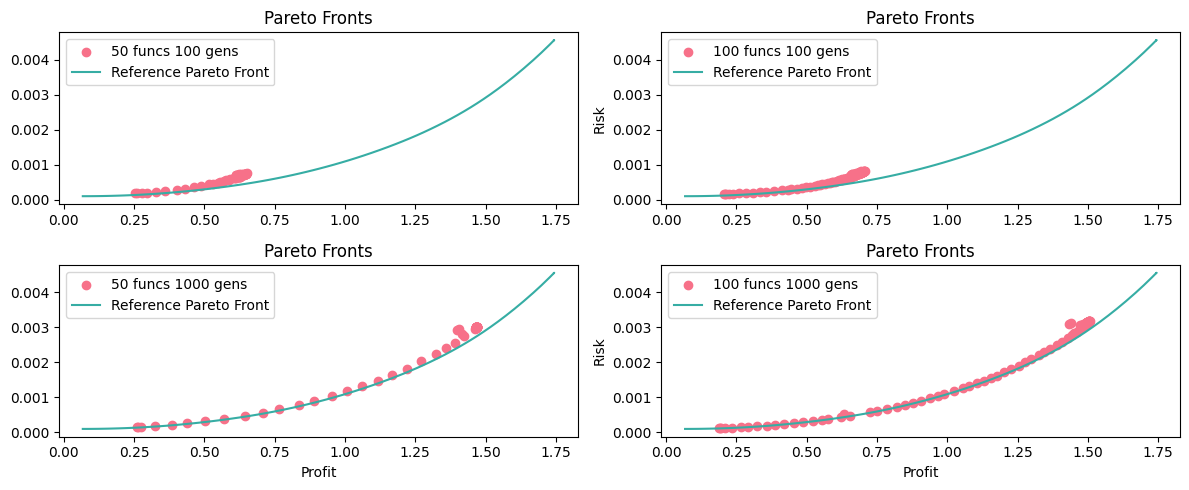

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

pareto_50_1000 = for_pareto_df[(for_pareto_df['Scalar_funcs'] == 50) & (for_pareto_df['TotalGenerations'] == 1000)]['Pareto'].values[-1]
pareto_100_1000 = for_pareto_df[(for_pareto_df['Scalar_funcs'] == 100) & (for_pareto_df['TotalGenerations'] == 1000)]['Pareto'].values[-1]
pareto_50_100 = for_pareto_df[(for_pareto_df['Scalar_funcs'] == 50) & (for_pareto_df['TotalGenerations'] == 100)]['Pareto'].values[-1]
pareto_100_100 = for_pareto_df[(for_pareto_df['Scalar_funcs'] == 100) & (for_pareto_df['TotalGenerations'] == 100)]['Pareto'].values[-1]

labels = ['50 funcs 1000 gens', '100 funcs 1000 gens']

# get_pareto_fronts_plot([pareto_50_1000, pareto_100_1000], ax = ax, algorithm_params={'Number of Scalarizing Functions': 50}, reference_pareto=reference_pareto, labels=labels)

get_pareto_fronts_plot([pareto_50_100], ax=axs[0, 0], algorithm_params={'Number of Scalarizing Functions': 50}, reference_pareto=reference_pareto, labels=['50 funcs 100 gens'])
get_pareto_fronts_plot([pareto_100_100], ax=axs[0, 1], algorithm_params={'Number of Scalarizing Functions': 100}, reference_pareto=reference_pareto, labels=['100 funcs 100 gens'])
get_pareto_fronts_plot([pareto_50_1000], ax=axs[1, 0], algorithm_params={'Number of Scalarizing Functions': 50}, reference_pareto=reference_pareto, labels=['50 funcs 1000 gens'])
get_pareto_fronts_plot([pareto_100_1000], ax=axs[1, 1], algorithm_params={'Number of Scalarizing Functions': 100}, reference_pareto=reference_pareto, labels=['100 funcs 1000 gens'])
axs[1,0].set_xlabel('Profit')
axs[1,1].set_xlabel('Profit')
axs[0, 1].set_ylabel('Risk')
axs[1, 1].set_ylabel('Risk')
plt.tight_layout()
plt.show()

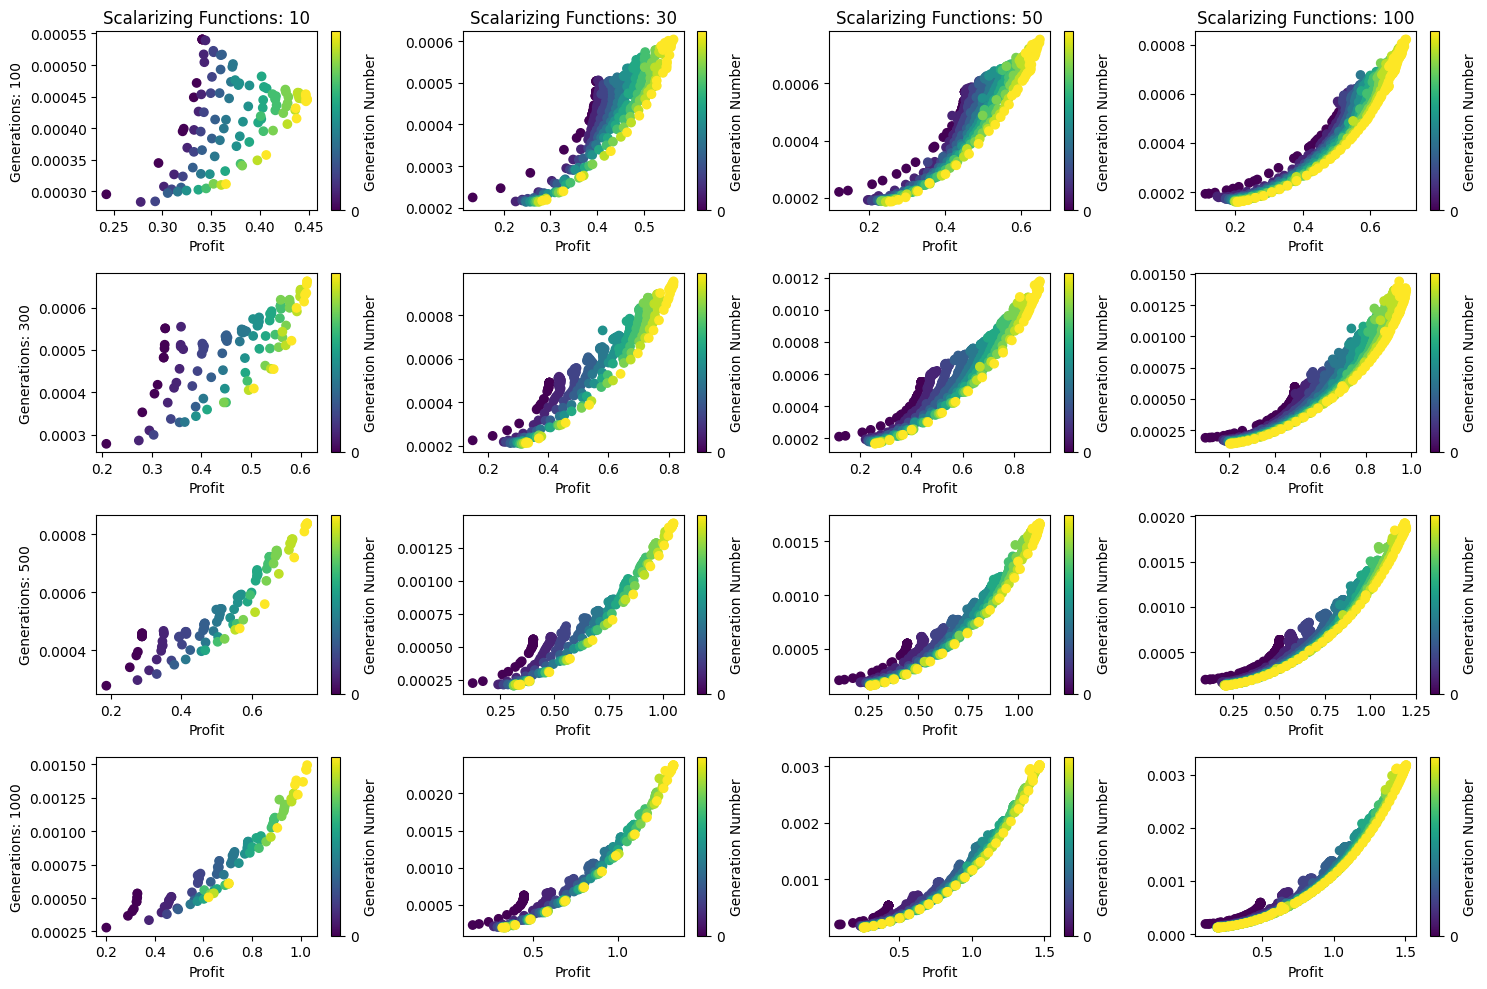

In [31]:
show_all_generation_plots(experiment_df)

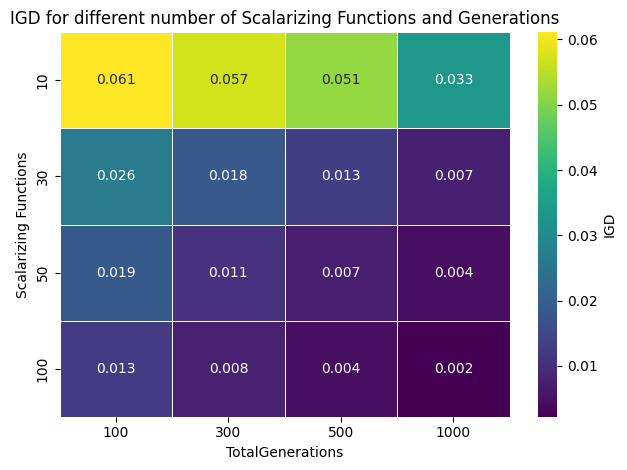

In [32]:
show_igd_heatmap(experiment_df)